In [1]:
import numpy as np

from copy import copy
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
import jax.numpy as jnp
from jax import random, grad, jit
from functools import partial
from RCN import RCN
from dysts.datasets import load_dataset
from dysts.flows import Lorenz

In [2]:
def lorenz(X, sigma=10, beta=2.667, rho=28):
    """
    The Lorenz-63 system equations

    :param t: the time (just for consistency)
    :param X: the x,y and z coordinates of the Lorenz System
    :param sigma, beta, rho: the parameters of the Lorenz System
    :return: Xdot (as xdot,ydot,zdot)
    """
    x, y, z = X

    xdot = sigma * (y - x)
    ydot = x * (rho - z) - y
    zdot = x * y - beta * z

    return np.array([xdot, ydot, zdot])

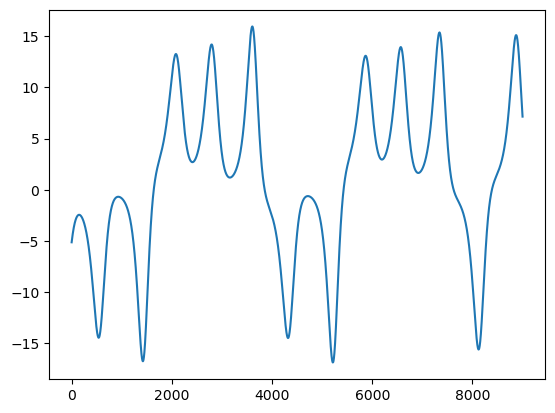

In [3]:
x_0 = np.array([10.,10.,10.])

dt = 0.001

N_steps = int(1e4)


X = []
X_dot = []
x= copy(x_0)

for i in range(N_steps):

  x_dot = lorenz(x)
  #print(x_dot)
  X.append(x)
  X_dot.append(x_dot)
  x = x + x_dot*dt

X = np.array(X)
X_dot = np.array(X_dot)

X_train= X[1000:]
X_dot_train = X_dot[1000:]

L_train = X_train.shape[0]
plt.plot(X_train[:, 0])

# NEW
---------------------------------------------

In [4]:
from dysts.flows import Lorenz

## Load and simulate an attractor
model = Lorenz()
model.dt = dt
model.ic = x_0
Z = model.make_trajectory(int(1e4), resample=False, method ='RK23')

In [5]:
X_train= X[:]
Z_train = Z[:]

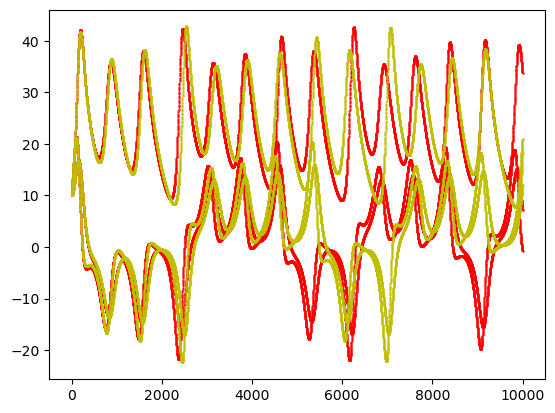

In [6]:
plt.plot(X_train[:,], 'r.', ms = 1)
plt.plot(Z_train[:,], 'y.',  ms = 1)

In [7]:
key = random.PRNGKey(42)

rcn_x = RCN(key=key, n_input=3, dt=dt)
rcn_x.train(X_train)
y_x = rcn_x.predict()

rcn_z = RCN(key=key, n_input=3, dt=dt)
rcn_z.train(Z_train)
y_z = rcn_z.predict()


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


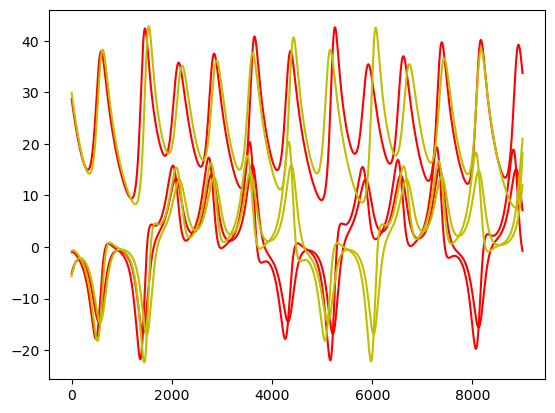

In [8]:
plt.plot(y_x[1000:], 'r')
plt.plot(y_z[1000:], 'y')


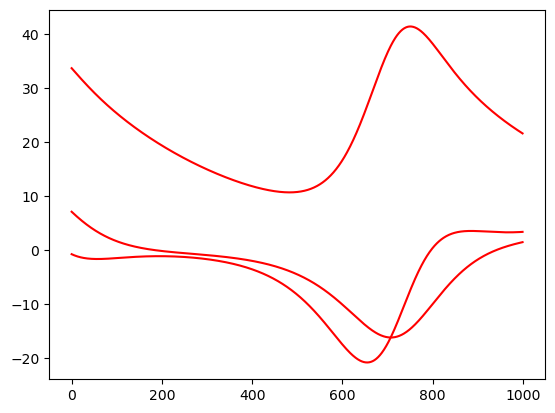

In [9]:
T_test = int(1000*dt)

pred_x=rcn_x.generate(T_test)
plt.plot(pred_x[:], 'r')

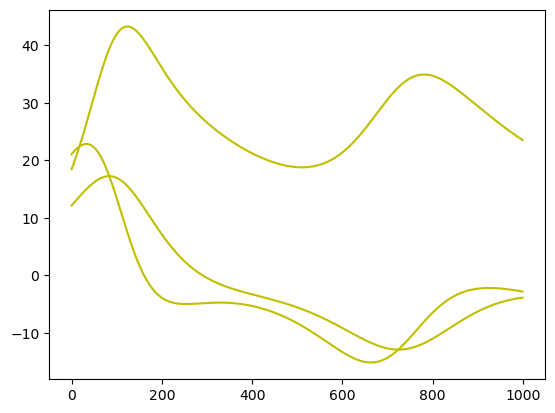

In [10]:
pred_z=rcn_z.generate(T_test)
plt.plot(pred_z[:],'y')

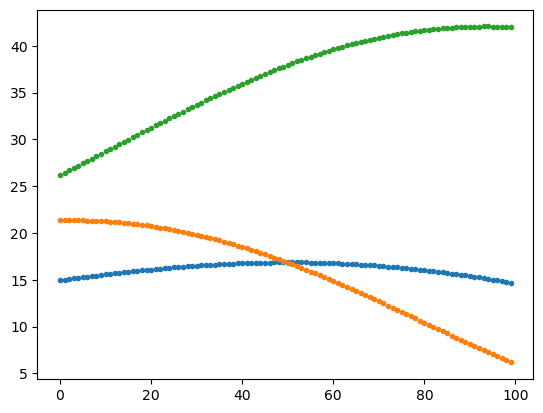

In [11]:
plt.plot(X_train[100:200], '.')

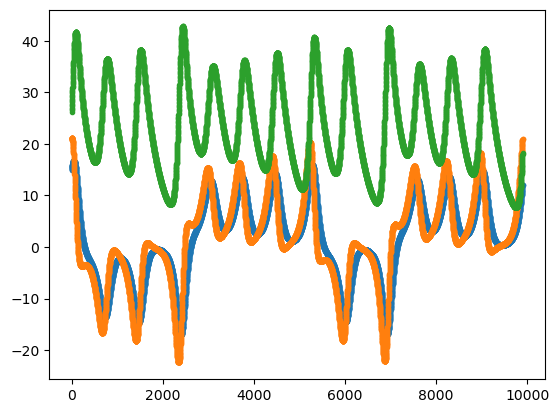

In [12]:
plt.plot(Z_train[100:], '.')

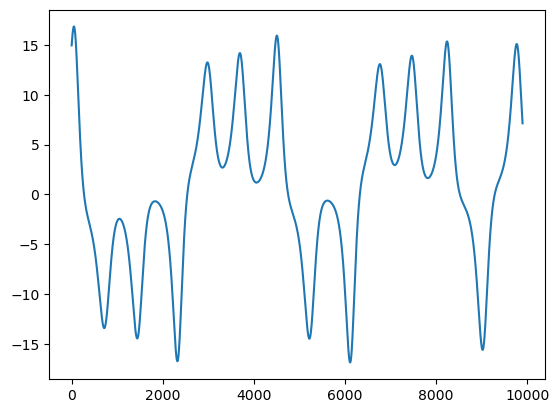

In [13]:
plt.plot((X_train[100:, 0]))

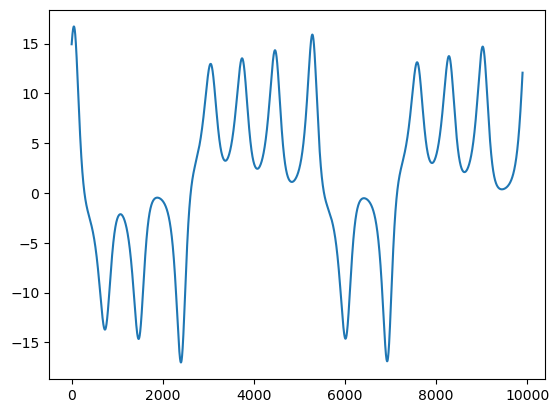

In [14]:
plt.plot((Z_train[100:, 0]))

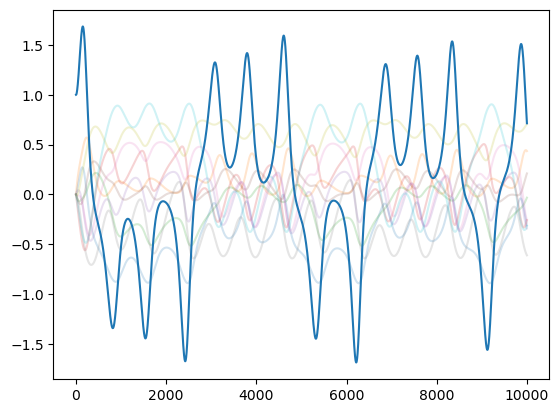

In [15]:
plt.plot(rcn_x.R[:,:10], alpha = 0.2)
plt.plot(X_train[:,0]/10)

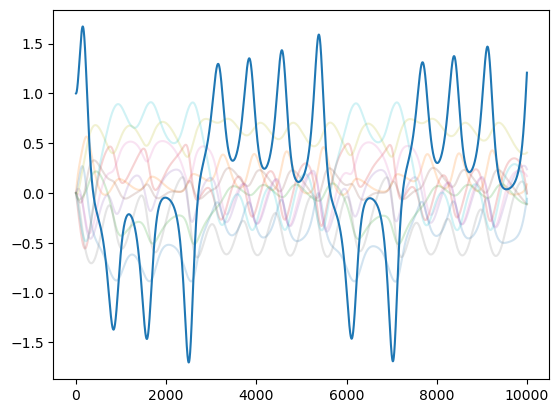

In [16]:
plt.plot(rcn_z.R[:,:10], alpha = 0.2)
plt.plot(Z_train[:,0]/10)

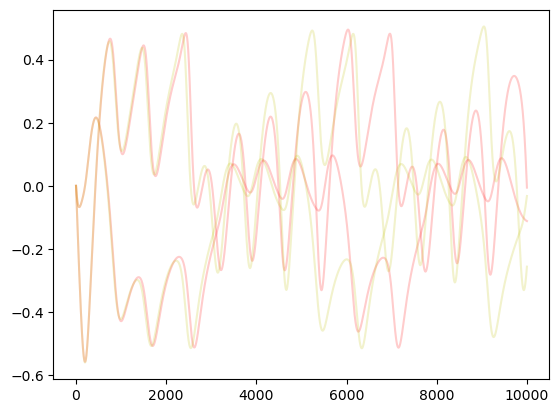

In [17]:
plt.plot(rcn_z.R[:,2:4], 'r', alpha = 0.2)
plt.plot(rcn_x.R[:,2:4], 'y', alpha = 0.2)

In [18]:
jnp.eye(100).shape

(100, 100)

In [19]:
states = rcn_x.R

In [20]:
states.shape

(10000, 500)

In [21]:
states

Array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.45092040e-03,  5.61067412e-03, -2.17689734e-03, ...,
         4.43801373e-04, -1.40342758e-03,  8.21184866e-04],
       [ 2.94602568e-03,  1.11506734e-02, -4.31133287e-03, ...,
         9.03522162e-04, -2.79862520e-03,  1.68504125e-03],
       ...,
       [-3.05281166e-01,  4.36606879e-01, -3.44553141e-02, ...,
        -1.11158371e-01, -7.18956432e-01,  8.76447673e-01],
       [-3.07573793e-01,  4.35932122e-01, -3.33748456e-02, ...,
        -1.12427519e-01, -7.19652496e-01,  8.76452015e-01],
       [-3.09854244e-01,  4.35231125e-01, -3.22940997e-02, ...,
        -1.13689475e-01, -7.20336255e-01,  8.76451391e-01]],      dtype=float64)

In [22]:
states.shape

(10000, 500)

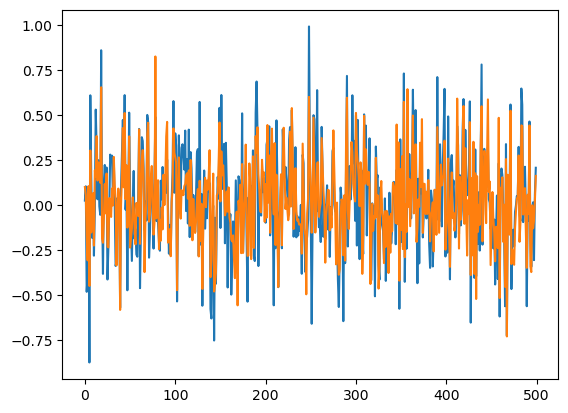

In [23]:
plt.plot(rcn_z.W_out[:,0])
plt.plot(rcn_x.W_out[:,0])

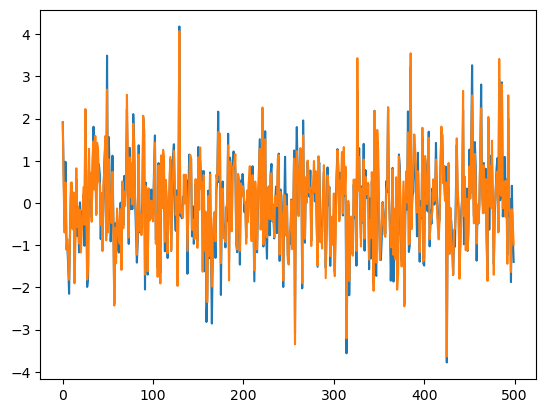

In [24]:
i = 2
plt.plot(rcn_x.W_out[:,i])
plt.plot(rcn_z.W_out[:,i])

In [28]:
rcn_z.train_MSE(normalize = False)

Array(8.96773845e-07, dtype=float64)

In [26]:
jnp.mean(((rcn_z.predict()[d:])-(Z_train[d:]) )**2)

NameError: name 'd' is not defined

In [ ]:
d = rcn_z.discarded_steps

means = jnp.mean(Z_train[d:], axis=0)
stds = jnp.std(Z_train[d:], axis=0)



In [ ]:
rcn_z.train_MSE(normalize = True)

In [ ]:
jnp.mean(((rcn_z.predict()[d:])/stds-(Z_train[d:])/stds )**2)